### Parse a quadruped robot `Snapbot`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Done.")

Done.


### Parse `Snapbot`

In [2]:
env = MuJoCoParserClass(name='Snapbot',rel_xml_path='../asset/snapbot/robot_4_1245.xml',VERBOSE=True)

[Snapbot] Instantiated from [/Users/sj/Dropbox/SJ/Research/Implementation/simple-mujoco-usage-v2/asset/snapbot/robot_4_1245.xml]
- Simulation timestep is [0.0040]sec and frequency is [250]HZ
- [Snapbot] has [24] bodies and body names are
['world', 'torso', 'Camera_module_1', 'Camera_module_2', 'Leg_module_1_1', 'Leg_module_1_2', 'Leg_module_1_3', 'Leg_module_1_4', 'Leg_module_1_4bar', 'Leg_module_2_1', 'Leg_module_2_2', 'Leg_module_2_3', 'Leg_module_2_4', 'Leg_module_2_4bar', 'Leg_module_4_1', 'Leg_module_4_2', 'Leg_module_4_3', 'Leg_module_4_4', 'Leg_module_4_4bar', 'Leg_module_5_1', 'Leg_module_5_2', 'Leg_module_5_3', 'Leg_module_5_4', 'Leg_module_5_4bar']
- [Snapbot] has [19] joints
 [00] name:[free] type:[free] joint range:[0.00 to 0.00]
 [01] name:[camera_1] type:[revolute] joint range:[0.00 to 0.00]
 [02] name:[camera_2] type:[revolute] joint range:[-3.14 to 0.00]
 [03] name:[leg_1_2] type:[revolute] joint range:[-0.75 to 0.75]
 [04] name:[leg_1_3] type:[revolute] joint range:[-0

### Plot initial pose

Creating offscreen glfw


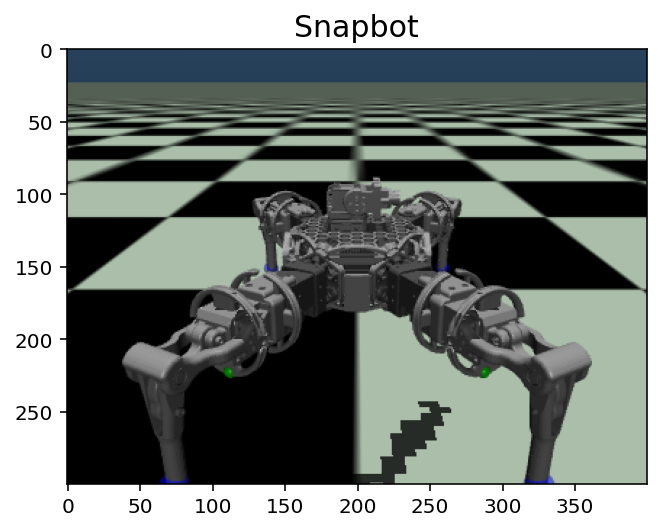

In [3]:
env.plot_scene(figsize=(8,4),title_str='Snapbot',title_fs=15,
               render_w=400,render_h=300,
               cam_distance=0.5,cam_elevation=-20,cam_lookat=env.get_p_body(body_name='torso'),
               RETURN_IMG=False)

### Simulate

In [4]:
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True,window_width=0.5,window_height=0.5,
                cam_distance=1.0,cam_elevation=-45,cam_lookat=[0,0,0])
env.set_max_sec(max_sec=5.0)
env.reset()
while env.IS_ALIVE():
    torque = np.zeros(env.n_actuator) # zero torque
    env.step(ctrl=torque,ctrl_idxs=None) # torque applied to revolute joints
    env.render(render_speedup=1.0,RENDER_ALWAYS=False)
    env.print(print_every_sec=1.0,VERBOSE=1)
print ("Done.")

Creating window glfw
Creating window glfw
tick:[1/1250], sec_wall:[0.172]sec, sec_sim:[0.004]sec
tick:[250/1250], sec_wall:[0.907]sec, sec_sim:[1.000]sec
tick:[500/1250], sec_wall:[1.932]sec, sec_sim:[2.000]sec
tick:[750/1250], sec_wall:[2.944]sec, sec_sim:[3.000]sec
tick:[1000/1250], sec_wall:[3.976]sec, sec_sim:[4.000]sec
tick:[1250/1250], sec_wall:[4.977]sec, sec_sim:[5.000]sec
Done.


### Plot final pose

Creating window glfw
Creating window glfw


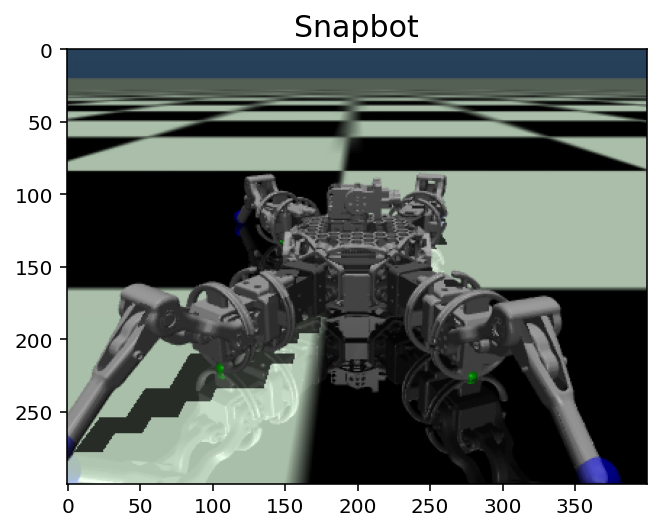

In [5]:
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True)
env.plot_scene(figsize=(8,4),title_str='Snapbot',title_fs=15,
               render_w=400,render_h=300,
               cam_distance=0.5,cam_elevation=-20,cam_lookat=env.get_p_body(body_name='torso'),
               RETURN_IMG=False)